In [8]:
"""
Importing all the necessary packages required
"""
import numpy as np
import matplotlib.pyplot as plt

"""
Here are all the constants/variables that are used to calculate the data
"""
R = 8.314 # Gas constant
T =303 # Temperature in Kelvin
Liter = 12 # Volume in Liters
V = Liter/1000 # Volume in cubic meters
mole = 1000 # Mole limit
inclCO2 = 8 
exclCO2 = 7
k = inclCO2 # Constant which changes whether we would like to include CO2
a_dictionary = {1:0.00346, 2:0.02453, 3:0.0208, 4:0.137, 5:0.1382, 7:0.3658, 6:0.1355} # a constant values 
b_dictionary = {1:2.38E-5, 2:2.651E-5, 3:1.672E-5, 4:3.87E-5, 5:3.186E-5, 7:4.286E-5, 6:3.201E-5} # b constant values
name_dictionary = {1:"Helium", 2:"Hydrogen", 3: "Neon", 4:"Nitrogen", 5:"Oxygen", 7:"Carbon Dioxide", 6:"Argon"} #Labelling the values to a gas

#I added this in later to allow us to have a wet mix
a_water = 0.5536 
b_water = 3.049E-5

#Function to calculate the pressure in the real gas model
def realgas(a,b,T,R,V,mole): #constant Volume
    n = 1  
    Preal = []
    limit = []
    for n in range (n,mole+1,1):
        P = (((n*R*T)/(V-(n*b)))-((n**2*a)/V**2))/100000
        Preal.append(P)
        limit.append(n)
        if P > 900:
            Preal.pop()
            limit.pop()
            break
    return Preal, limit

#Function to calculate the pressure in the ideal gas model
def ideal (T,R,V,mole,max):
    n=1
    Pideal = []
    limit = []
    for n in range (mole):
        P = (n*R*T)/(V)/100000
        Pideal.append(P)
        limit.append (n)
        if n > max:
            Pideal.pop()
            limit.pop()
            break
    return Pideal,limit

In [9]:
#Finding vanderwaals constants for mixtures 
def find_atri(a_O2, a_He, a_Ni,b_O2, b_He, b_Ni, x_O2, x_He, x_Ni):
    a = (x_O2**2 * a_O2) + (x_He**2 * a_He) + (x_Ni**2 * a_Ni) + 2 * (x_O2 * x_He * np.sqrt(a_O2 * a_He)) + 2 * (x_O2 * x_Ni * np.sqrt(a_O2 * a_Ni)) + 2 * (x_He * x_Ni * np.sqrt(a_He * a_Ni))
    b = (x_O2**2 * b_O2) + (x_He**2 * b_He) + (x_Ni**2 * b_Ni) + 2 * (x_O2 * x_He * np.sqrt(b_O2 * b_He)) + 2 * (x_O2 * x_Ni * np.sqrt(b_O2 * b_Ni)) + 2 * (x_He * x_Ni * np.sqrt(b_He * b_Ni))
    return a , b
#Typical trimix: 16% O2, 40% He, 44% N2
a_trimix, b_trimix = find_atri(a_dictionary[5], a_dictionary[1], a_dictionary[4],b_dictionary[5], b_dictionary[1], b_dictionary[4], 0.16, 0.40, 0.44)

def find_abHeliox(a_He, a_O2,b_He, b_O2, x_He, x_O2):
    a = (x_He**2 * a_He) + (x_O2**2 * a_O2) + 2 * (x_He * x_O2 * np.sqrt(a_He * a_O2))
    b = (x_He**2 * b_He) + (x_O2**2 * b_O2) + 2 * (x_He * x_O2 * np.sqrt(b_He * b_O2))
    return a, b
#Typical Heliox for use at 200m: 2% O2, 98% He
a_Heliox, b_Heliox = find_abHeliox(a_dictionary[5], a_dictionary[1],b_dictionary[5], b_dictionary[1], 0.02, 0.98)

def find_abDryAir(a_Ni, a_O2, a_Ar, b_Ni, b_O2, b_Ar, x_Ni, x_O2, x_Ar):
    a = (x_Ni**2 * a_Ni) + (x_O2**2 * a_O2) + (x_Ar**2 * a_Ar) + 2 * (x_Ni * x_O2 * np.sqrt(a_Ni * a_O2)) + 2 * (x_Ni * x_Ar * np.sqrt(a_Ni * a_Ar)) + 2 * (x_O2 * x_Ar * np.sqrt(a_O2 * a_Ar))
    b = (x_Ni**2 * b_Ni) + (x_O2**2 * b_O2) + (x_Ar**2 * b_Ar) + 2 * (x_Ni * x_O2 * np.sqrt(b_Ni * b_O2)) + 2 * (x_Ni * x_Ar * np.sqrt(b_Ni * b_Ar)) + 2 * (x_O2 * x_Ar * np.sqrt(b_O2 * b_Ar))
    return a, b
#Typical dry Air   78% N2, 21% O2, 1% Ar
a_DryAir, b_DryAir = find_abDryAir(a_dictionary[5], a_dictionary[4],a_dictionary[6],b_dictionary[5], b_dictionary[4],b_dictionary[6], 0.78, 0.21, 0.01)

def find_abWetAir(a_Ni, a_O2, a_Ar, a_H2O, b_Ni, b_O2, b_Ar, b_H2O, x_Ni, x_O2, x_Ar, x_H2O):
    a = (x_Ni**2 * a_Ni) + (x_O2**2 * a_O2) + (x_Ar**2 * a_Ar) + (x_H2O**2 * a_H2O) + 2 * (x_Ni * x_O2 * np.sqrt(a_Ni * a_O2)) + 2 * (x_Ni * x_Ar * np.sqrt(a_Ni * a_Ar)) + 2 * (x_O2 * x_Ar * np.sqrt(a_O2 * a_Ar)) + 2 * (x_Ni * x_H2O * np.sqrt(a_Ni * a_H2O)) + 2 * (x_O2 * x_H2O * np.sqrt(a_O2 * a_H2O)) + 2 * (x_Ar * x_H2O * np.sqrt(a_Ar * a_H2O))
    b = (x_Ni**2 * b_Ni) + (x_O2**2 * b_O2) + (x_Ar**2 * b_Ar) + (x_H2O**2 * b_H2O) + 2 * (x_Ni * x_O2 * np.sqrt(b_Ni * b_O2)) + 2 * (x_Ni * x_Ar * np.sqrt(b_Ni * b_Ar)) + 2 * (x_O2 * x_Ar * np.sqrt(b_O2 * b_Ar)) + 2 * (x_Ni * x_H2O * np.sqrt(b_Ni * b_H2O)) + 2 * (x_O2 * x_H2O * np.sqrt(b_O2 * b_H2O)) + 2 * (x_Ar * x_H2O * np.sqrt(b_Ar * b_H2O))
    return a, b
#Typical wet Air   76% N2, 20% O2, 1% Ar, 3% H2O
a_WetAir, b_WetAir = find_abWetAir(a_dictionary[5], a_dictionary[4],a_dictionary[3],a_water,b_dictionary[5], b_dictionary[4],b_dictionary[3],b_water, 0.76, 0.20, 0.01, 0.03)




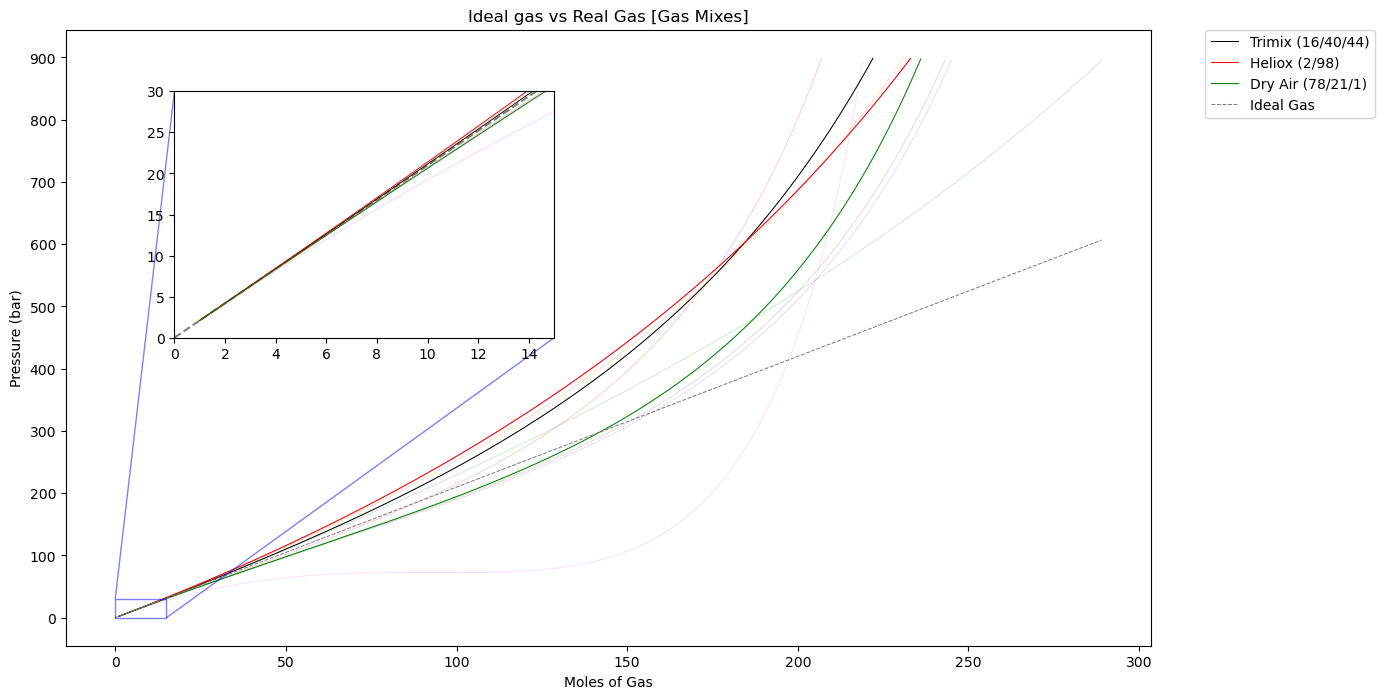

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
largest = []
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)
#ax.plot(260, ideal(T,R,V,mole), label='Ideal Gas')
 
for i in range (1,k):
    Preal, limit = realgas(a_dictionary[i],b_dictionary[i],T,R,V,mole)
    largest.append(np.max(limit))
    ax.plot (limit, Preal, linewidth = 0.75,alpha = 0.2) #,label=name_dictionary[i]
max = np.max(largest)

Prealtrimix, limittrimix = realgas(a_trimix, b_trimix, T, R, V, mole)
ax.plot(limittrimix, Prealtrimix, label = 'Trimix (16/40/44)', linewidth = 0.75,color = 'black')

PrealHeliox, limitHeliox = realgas(a_Heliox, b_Heliox, T, R, V, mole)
ax.plot (limitHeliox, PrealHeliox, label = 'Heliox (2/98)', linewidth = 0.75, color = 'red')

PrealAir, limitAir = realgas(a_DryAir, b_DryAir, T, R, V, mole)
ax.plot (limitAir, PrealAir, label = 'Dry Air (78/21/1)', linewidth = 0.75, color = 'green')

PrealWetAir, limitWetAir = realgas(a_WetAir, b_WetAir, T, R, V, mole)
#ax.plot (limitWetAir, PrealWetAir, label = 'Wet Air (76/20/1/3)', linewidth = 0.75, color = 'blue')

Pideal, limit1=  ideal (T,R,V,mole,max)
plt.yticks(np.arange(0,1000,100))
ax.plot (limit1 ,Pideal, label = "Ideal Gas", linestyle = '--', linewidth = 0.75)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


axins = ax.inset_axes([0.1, 0.5, 0.35, 0.4])

x1, x2, y1,y2 = 0, 15, 0, 30
for i in range (1,k):
    Preal, limit = realgas(a_dictionary[i],b_dictionary[i],T,R,V,mole)
    largest.append(np.max(limit))
    axins.plot (limit, Preal,label=name_dictionary[i], linewidth = 1,alpha=0.2)
axins.plot (limit1 ,Pideal, label = "Ideal Gas", linestyle = '--')
axins.plot(limittrimix, Prealtrimix, label = 'Trimix (17/33/50)', linewidth = 0.6,color = 'black')
axins.plot (limitHeliox, PrealHeliox, label = 'Heliox (2/98)', linewidth = 0.6, color = 'red')
axins.plot (limitAir, PrealAir, label = 'Dry Air (78/21/1)', linewidth = 0.6, color = 'green')
# axins.plot (limitWetAir, PrealWetAir, label = 'Wet Air (76/20/1/3)', linewidth = 0.6, color = 'blue')
axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)
ax.indicate_inset_zoom(axins, edgecolor = 'blue')

ax.set_xlabel('Moles of Gas')
ax.set_ylabel('Pressure (bar)')
ax.set_title("Ideal gas vs Real Gas [Gas Mixes]" )#@ fixed volume of {} Liters @ fixed temperature of {} K".format(Liter, T)
#

plt.savefig('Graph 2.png', dpi=300, bbox_inches='tight',transparent = False)

#ax.set_ylim(0,200)



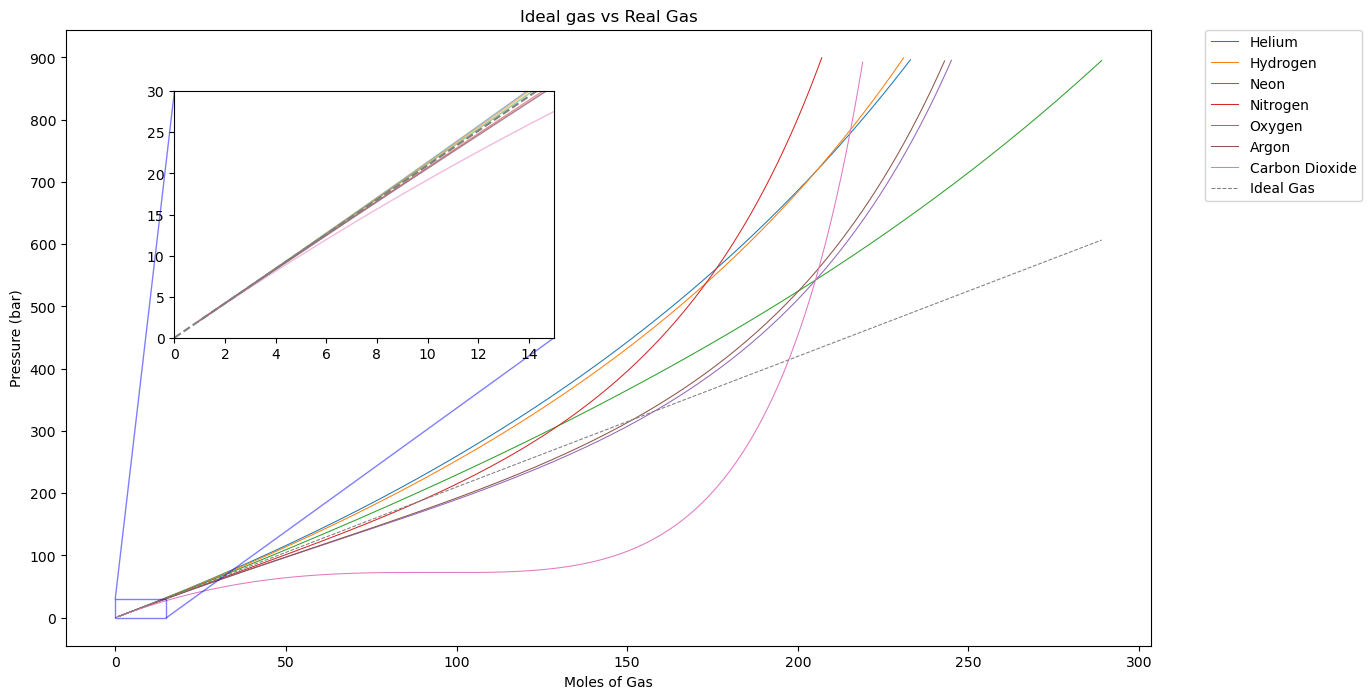

In [11]:
fig, ax = plt.subplots(figsize=(14,8))
fig.patch.set_facecolor('white')
fig.patch.set_alpha(0.9)
largest = []
#ax.plot(260, ideal(T,R,V,mole), label='Ideal Gas')
 
for i in range (1,k):
    Preal, limit = realgas(a_dictionary[i],b_dictionary[i],T,R,V,mole)
    largest.append(np.max(limit))
    ax.plot (limit, Preal,label=name_dictionary[i], linewidth = 0.75)
max = np.max(largest)

Pideal, limit1=  ideal (T,R,V,mole,max)

ax.plot (limit1 ,Pideal, label = "Ideal Gas", linestyle = '--',linewidth = 0.75)
plt.yticks(np.arange(0,1000,100))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)


axins = ax.inset_axes([0.1, 0.5, 0.35, 0.4])

x1, x2, y1,y2 = 0, 15, 0, 30
for i in range (1,k):
    Preal, limit = realgas(a_dictionary[i],b_dictionary[i],T,R,V,mole)
    largest.append(np.max(limit))
    axins.plot (limit, Preal,label=name_dictionary[i], linewidth = 1, alpha = 0.5)
axins.plot (limit1 ,Pideal, label = "Ideal Gas", linestyle = '--')

axins.set_xlim(x1,x2)
axins.set_ylim(y1,y2)
ax.indicate_inset_zoom(axins, edgecolor = 'blue')

ax.set_xlabel('Moles of Gas')
ax.set_ylabel('Pressure (bar)')
ax.set_title("Ideal gas vs Real Gas")#at fixed volume of {} liters and fixed temperature {} K".format(Liter, T)
#

#ax.set_ylim(0,200)
plt.savefig('Graph 1.png', dpi=300, bbox_inches='tight')
